In [34]:
# Load the saved models
generator_G = tf.keras.models.load_model('generator_G.h5')
generator_F = tf.keras.models.load_model('generator_F.h5')

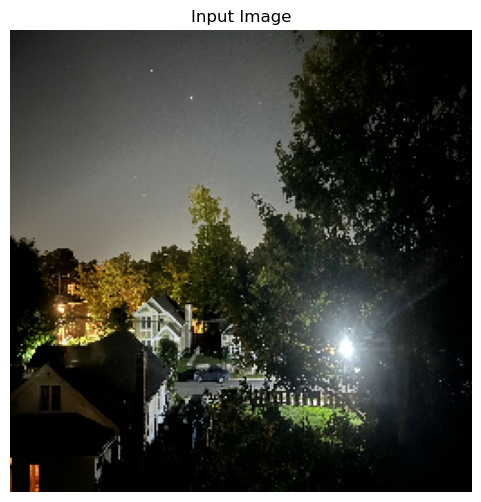

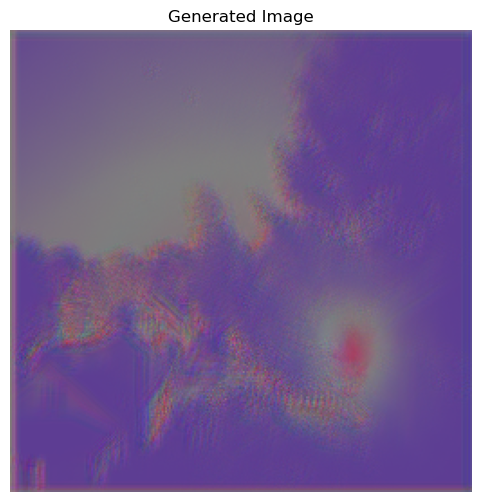

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Image parameters
IMG_HEIGHT = 256
IMG_WIDTH = 256

def preprocess_image(image_path, img_height=256, img_width=256):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image = (image / 127.5) - 1  # Normalize to [-1, 1]
    image = tf.expand_dims(image, 0)  # Add batch dimension
    return image

def predict_image(image_path, generator_model, img_height=256, img_width=256):
    image = preprocess_image(image_path, img_height, img_width)
    generated_image = generator_model(image, training=True)
    
    # Rescale the image to [0, 1]
    generated_image = (generated_image + 1) / 2.0

    # Plot the input image (processed)
    plt.figure(figsize=(6, 6))
    plt.imshow((image[0] + 1) / 2.0)  # Rescale to [0, 1] for display
    plt.title("Input Image")
    plt.axis('off')
    plt.show()

    # Plot the generated image
    plt.figure(figsize=(6, 6))
    plt.imshow(generated_image[0])  # Show the generated image
    plt.title("Generated Image")
    plt.axis('off')
    plt.show()

# Example usage:
image_path = '/Users/harshavardhan/Downloads/IMG_2529.jpg'
predict_image(image_path, generator_G, img_height=IMG_HEIGHT, img_width=IMG_WIDTH)